In [1]:
import pandas as pd

import pylab as plt

import seaborn as sns

import sys

import re

import warnings
warnings.simplefilter('ignore')

sys.path.append(r'C:\Users\Gaspar\Desktop\project1_global_shark_attacks\src')

from src import getGraphic

In [2]:
df_original = pd.read_csv('../data/attacks.csv', encoding = 'latin1')

df = df_original.copy()

pd.set_option('max_columns', None)

#Let's rename columns names for avoid spaces, uppercases, points, etc.

df.columns=[c.lower().replace(' ','_').replace(':','').replace('.','_').replace('(','').replace(')','').replace('/','') for c in df.columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex_                    5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_yn                5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species_                3464 non-null 

In [4]:
df.head()

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_yn,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


<AxesSubplot:>

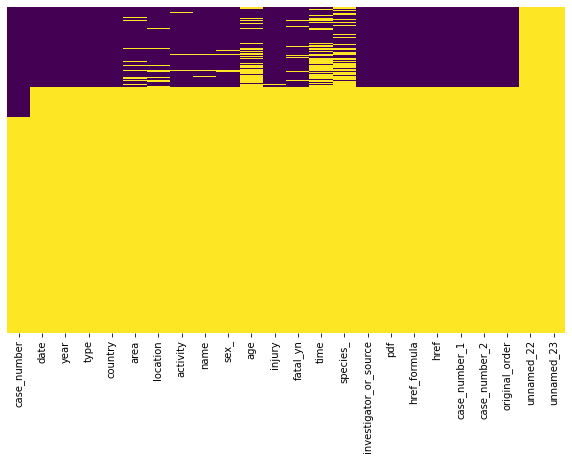

In [5]:
getGraphic(df)

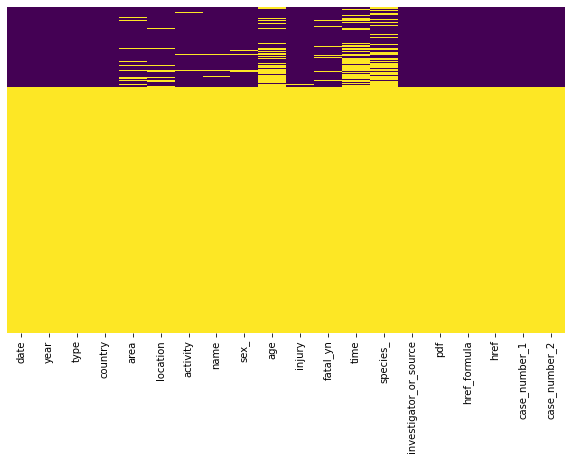

In [6]:
subset_util = list(df.columns)[1:-3]

getGraphic(df[subset_util]);

In [7]:
#Estos son las filas con todos los valores nulos

df[subset_util].isnull().all(1).sum()

19421

In [8]:
#Hemos eliminado y guardado las filas nulas para trabajar con el resto

df_rowsnull = df[df[subset_util].isnull().all(1)]

index_rowsnull = list(df_rowsnull.index)

df.drop(index_rowsnull, axis = 0, inplace = True)

In [9]:
df_rowsnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19421 entries, 6302 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             2401 non-null   object 
 1   date                    0 non-null      object 
 2   year                    0 non-null      float64
 3   type                    0 non-null      object 
 4   country                 0 non-null      object 
 5   area                    0 non-null      object 
 6   location                0 non-null      object 
 7   activity                0 non-null      object 
 8   name                    0 non-null      object 
 9   sex_                    0 non-null      object 
 10  age                     0 non-null      object 
 11  injury                  0 non-null      object 
 12  fatal_yn                0 non-null      object 
 13  time                    0 non-null      object 
 14  species_                0 non-null 

<AxesSubplot:>

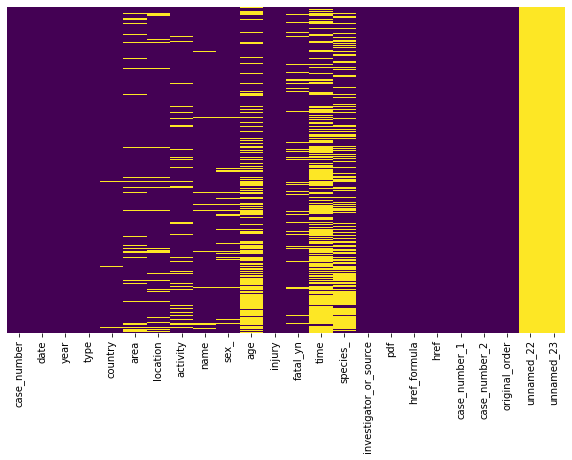

In [10]:
getGraphic(df)

<AxesSubplot:>

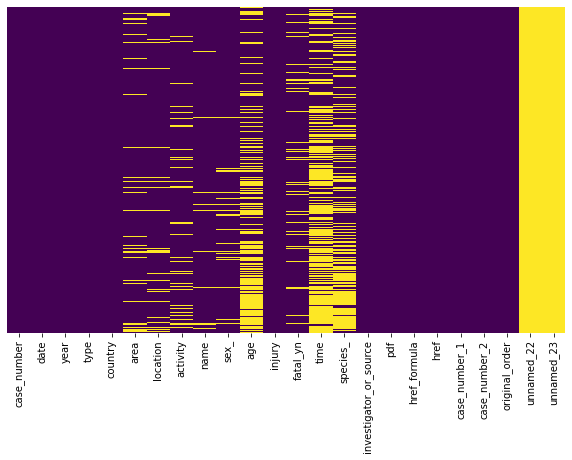

In [11]:
# Country will be unknown if null

df['country'].fillna('unknown', inplace = True)

getGraphic(df)

<AxesSubplot:>

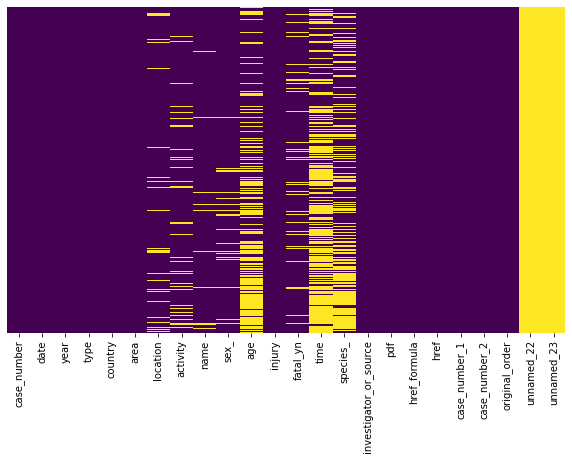

In [12]:
if df['country'].item == 'unknown': df['area'][df['area'].isnull()] = 'unknown'
    
else: df['area'][df['area'].isnull()] = 'Some area from ' + df['country']

getGraphic(df)

<AxesSubplot:>

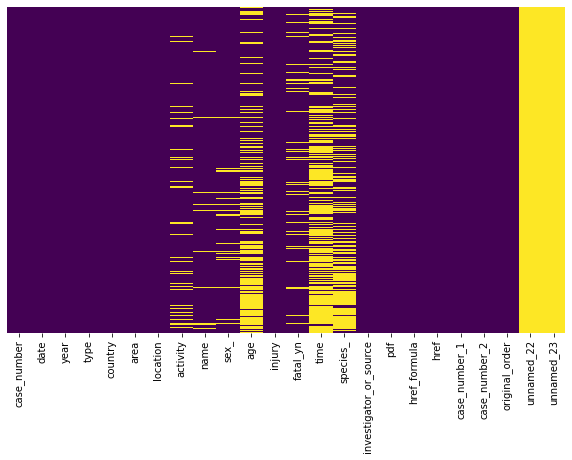

In [13]:
if df['area'].item != 'unknown': df['location'][df['location'].isnull()] = 'Some location from ' + df['area']
    
else: df['location'][df['location'].isnull()] = 'unknown'

getGraphic(df)

<AxesSubplot:>

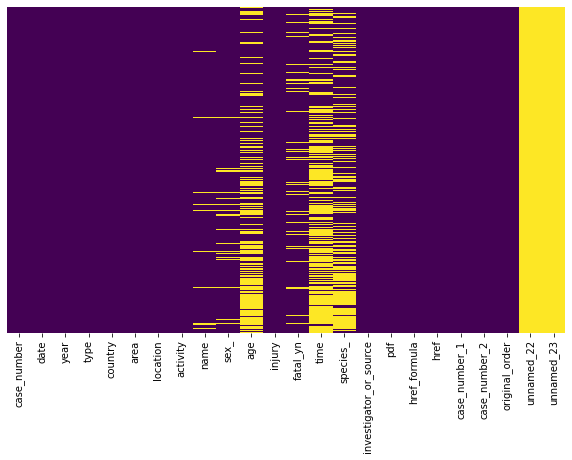

In [14]:
df['activity'].fillna('Any activity near water', inplace = True)
    
getGraphic(df)

<AxesSubplot:>

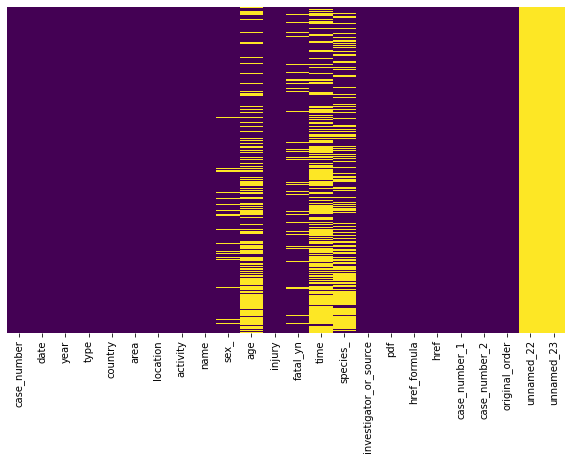

In [15]:
if df['sex_'].item == 'M': df['name'][df['name'].isnull()] = 'male'
    
elif df['sex_'].item == 'F': df['name'][df['name'].isnull()] = 'female'
    
else: df['name'][df['name'].isnull()] = 'unknown'
    
getGraphic(df)

<AxesSubplot:>

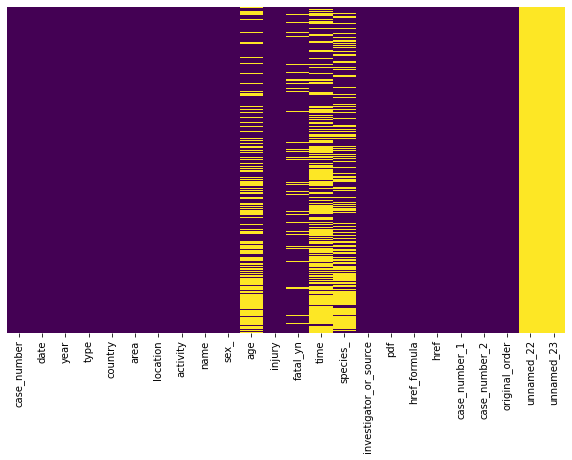

In [16]:
if df['name'].item == 'male': df['sex_'][df['sex_'].isnull()] = 'M'
    
elif df['name'].item == 'female': df['sex_'][df['sex_'].isnull()] = 'F'
    
else: df['sex_'][df['sex_'].isnull()] = 'unknown'

df['sex_']= df['sex_'].str.replace(' ','').str.replace('N','unknown').str.replace('lli','unknown').str.replace('.','unknown')

getGraphic(df)

<AxesSubplot:>

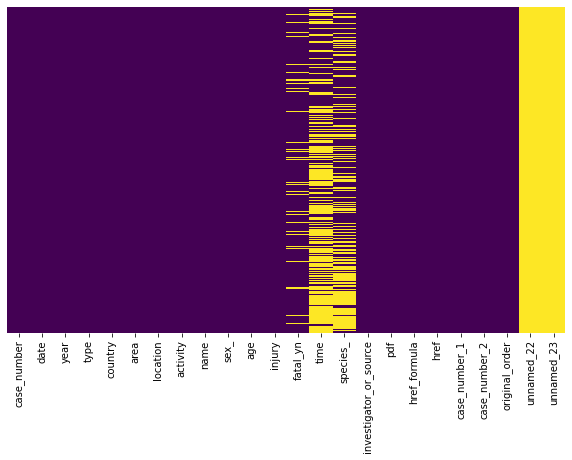

In [17]:
df['age'] = df.age.str.extract(r'(\d\d)')

df['age'] = df['age'].astype(float)

mean_age = df['age'].mean()

df['age'].fillna(mean_age, inplace = True)

getGraphic(df)

<AxesSubplot:>

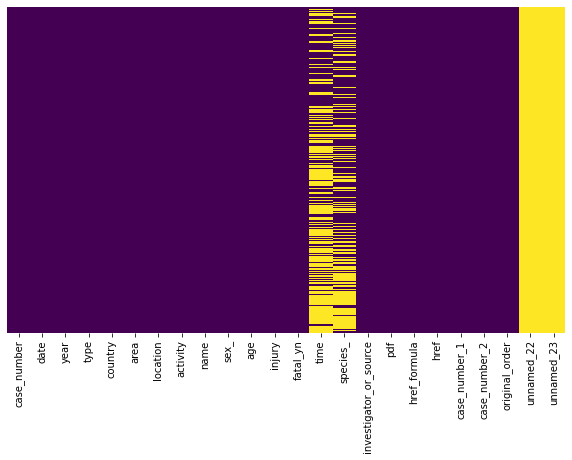

In [18]:
df['fatal_yn'].fillna('UNKNOWN', inplace = True)

df['fatal_yn'] = df['fatal_yn'].str.replace(' ','')

df['fatal_yn'][df['fatal_yn']=='M'] = 'UNKNOWN'

df['fatal_yn'][df['fatal_yn']=='2017'] = 'UNKNOWN'

df['fatal_yn'][df['fatal_yn']=='y'] = 'UNKNOWN'

getGraphic(df)

In [79]:
#df['time'] = df.time.str.extract(r'(\d\d[h]\d\d)')


#dict(df['time'].value_counts())

In [ ]:
'''df['time'][df['time']=='Afternoon'] = '15h00'

df['time'][df['time']=='Morning'] = '11h00'

df['time'][df['time']=='Night'] = '23h00'

df['time'][df['time']=='--'] = 'unknown'

df['time'][df['time']=='Sunset'] = '19h00'

df['time'][df['time']=='Late afternoon'] = '18h00'

df['time'][df['time']=='Evening'] = '20h00'

df['time'][df['time']=='P.M.'] = '20h00'

df['time'][df['time']=='Evening'] = '20h00'

dict(df['time'].value_counts())'''